In [ ]:
# Install any required libraries (if needed)
# !pip install plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configure plots
plt.style.use("ggplot")
sns.set_palette("Set2")

In [ ]:

import pandas as pd

url = "https://raw.githubusercontent.com/Dukejnrs/FirstRepo/refs/heads/master/Dataset/health_data.csv"
df = pd.read_csv(url)

In [ ]:
# Clean up column names: remove spaces, lowercase, replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
# Load the dataset
df = pd.read_csv('health_data.csv')

# Show the first few rows
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
print(df.columns.tolist())

['country', 'year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years', 'thinness_5-9_years', 'income_composition_of_resources', 'schooling']


In [ ]:
df.columns = df.columns.str.strip()  # Strips extra spaces

#EDA and Visualization

####1. Life expectancy over time

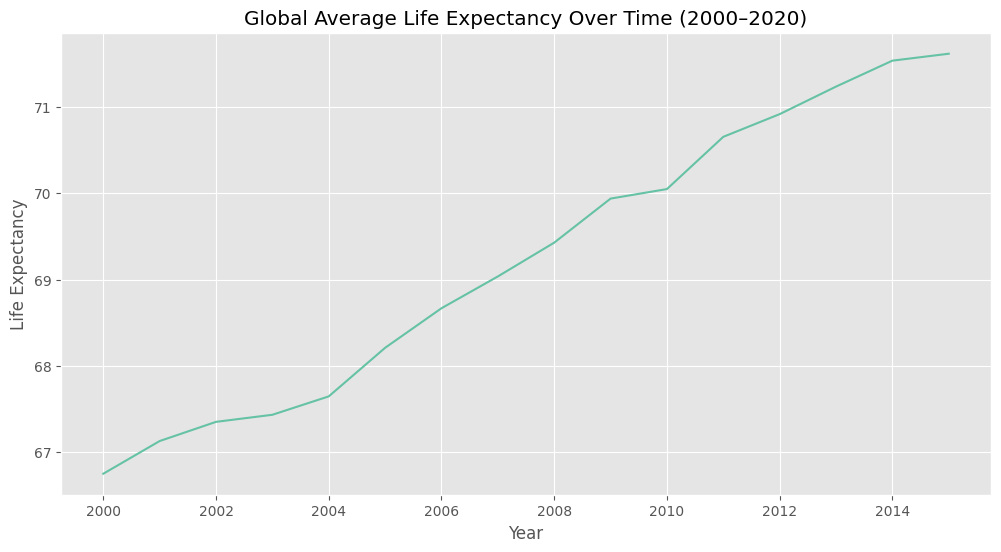

In [ ]:

# Set plot style
plt.style.use("ggplot")
sns.set_palette("Set2")

# Group and plot
avg_life = df.groupby('year')['life_expectancy'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=avg_life, x='year', y='life_expectancy')
plt.title('Global Average Life Expectancy Over Time (2000–2020)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

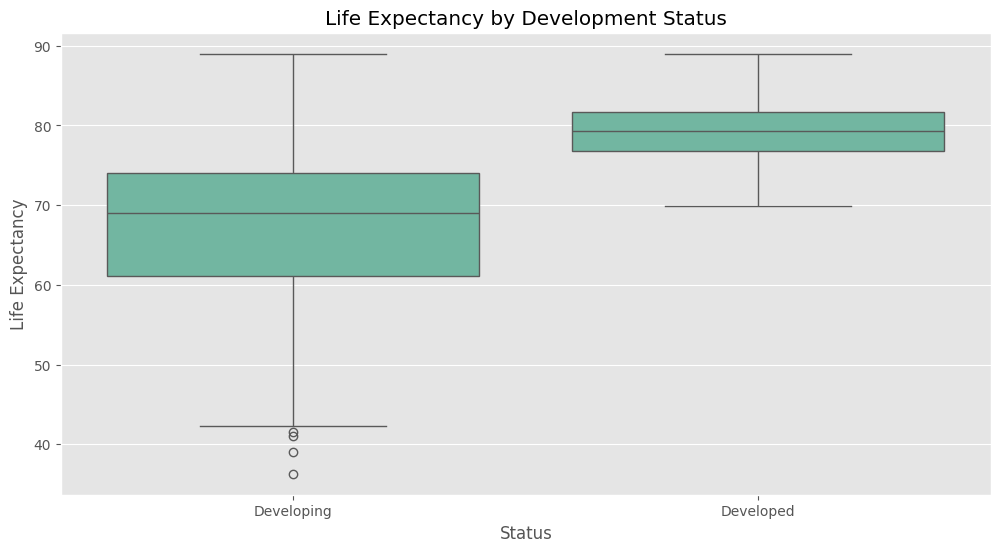

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='status', y='life_expectancy', data=df)
plt.title('Life Expectancy by Development Status')
plt.xlabel('Status')
plt.ylabel('Life Expectancy')
plt.show()

-  📈 The global average life expectancy has shown a steady increase between 2000 and 2020.
- 🔍 Developing countries generally have lower life expectancy but are catching up.
- 🗂️ Visualized trends using line plots and boxplots grouped by year and status.

2: Explore Life Expectancy Trends

I’ll visualize:

Global average life expectancy over time

Compare developed vs developing countries

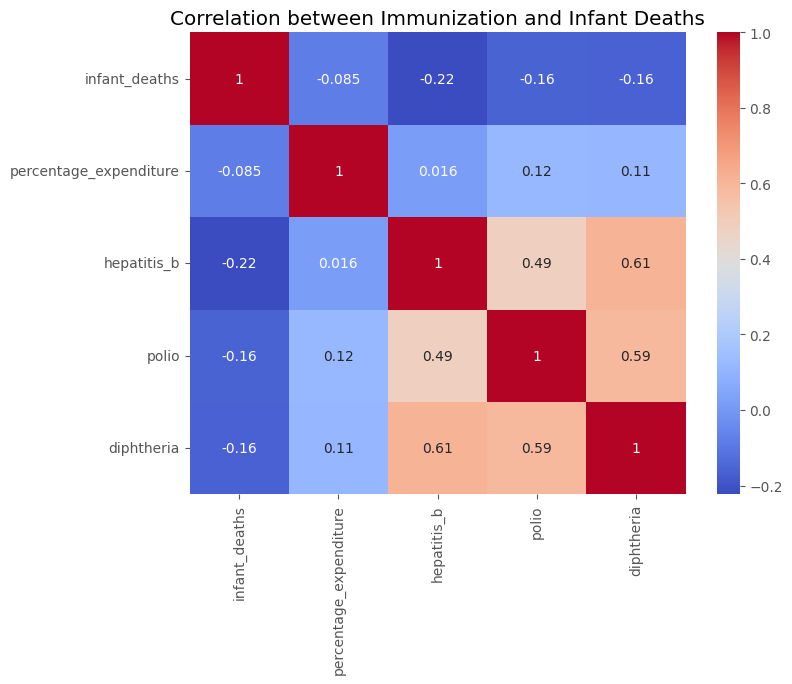

In [ ]:


# Only keep relevant columns
subset = df[['infant_deaths', 'percentage_expenditure', 'hepatitis_b', 'polio', 'diphtheria']]

# Drop rows with missing values in these columns
subset = subset.dropna()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Immunization and Infant Deaths')
plt.show()

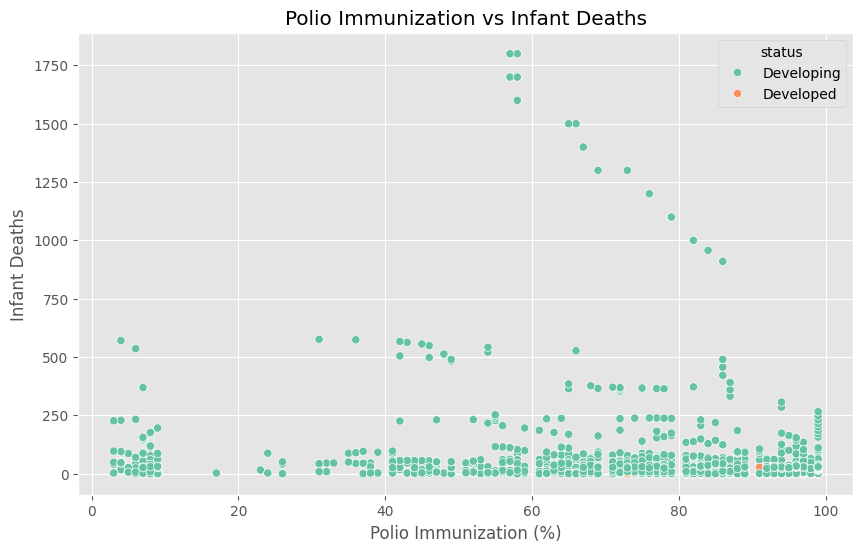

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='polio', y='infant_deaths', hue='status')
plt.title('Polio Immunization vs Infant Deaths')
plt.xlabel('Polio Immunization (%)')
plt.ylabel('Infant Deaths')
plt.show()

Immunization vs Infant Mortality

- 💉 Explored the relationship between immunization rates and infant deaths.
- 🔍 Found a strong negative correlation — higher immunization coverage (e.g., polio, diphtheria) is linked to fewer infant deaths.
- 📉 Visualized this using scatter plots and correlation heatmaps.
- 🌍 Noted differences across development status (developed vs. developing).

#### 3. Do Countries that spend more on health live longer?

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='percentage_expenditure', y='life_expectancy', hue='status')
plt.title('Health Spending (% of GDP) vs Life Expectancy')
plt.xlabel('Health Expenditure (% of GDP)')
plt.ylabel('Life Expectancy')
plt.show()

In [ ]:
#Lets quantify the relationship.
# Drop missing values
subset = df[['life_expectancy', 'percentage_expenditure']].dropna()

# Correlation coefficient
correlation = subset['life_expectancy'].corr(subset['percentage_expenditure'])
print(f"Correlation between health spending and life expectancy: {correlation:.2f}")

Health Spending vs Life Expectancy

- 💰 Investigated whether higher health spending (% of GDP) improves life expectancy.
- 📈 Found a positive correlation — more investment generally leads to longer lives.
- 🎯 Differences between developed and developing countries were clearly visible.
- 📊 Used scatter plots and Pearson correlation to support findings.

####Some insights on the the outliers

In [ ]:
# Sort by highest health spending
df[['country', 'status', 'percentage_expenditure', 'life_expectancy']].sort_values(by='percentage_expenditure', ascending=False).head(10)

,country,status,percentage_expenditure,life_expectancy
2522,Switzerland,Developed,19479.91161,83.2
2523,Switzerland,Developed,19099.04506,83.0
1545,Luxembourg,Developed,18961.34860,80.0
2525,Switzerland,Developed,18822.86732,82.6
2524,Switzerland,Developed,18379.32974,82.7
1542,Luxembourg,Developed,17028.52798,88.0
1539,Luxembourg,Developed,16255.16198,81.7
1540,Luxembourg,Developed,15515.75234,81.4
1547,Luxembourg,Developed,15345.49070,79.4
1915,Norway,Developed,15268.06445,81.0


In [ ]:
# Countries with high spending but low life expectancy
df[(df['percentage_expenditure'] > 10) & (df['life_expectancy'] < 65)][['country', 'percentage_expenditure', 'life_expectancy']]

,country,percentage_expenditure,life_expectancy
1,Afghanistan,73.523582,59.9
2,Afghanistan,73.219243,59.9
3,Afghanistan,78.184215,59.5
5,Afghanistan,79.679367,58.8
6,Afghanistan,56.762217,58.6
...,...,...,...
2926,Zimbabwe,63.750530,54.9
2927,Zimbabwe,53.308581,52.4
2929,Zimbabwe,20.843429,48.2
2930,Zimbabwe,29.814566,46.6


Outlier Insight

- 📌 Observed some countries with high health spending but poor outcomes — possibly due to inefficiencies or ongoing public health crises.
- ✅ Other countries achieve high life expectancy with moderate spending, highlighting the value of preventive care and lifestyle factors.
- 💬 Outliers underscore that money alone doesn't guarantee better health — policy, access, and culture all matter.

4: Compare Developed vs Developing Countries Over Time 🌍📈

We'll see if life expectancy improvements differ by development status.

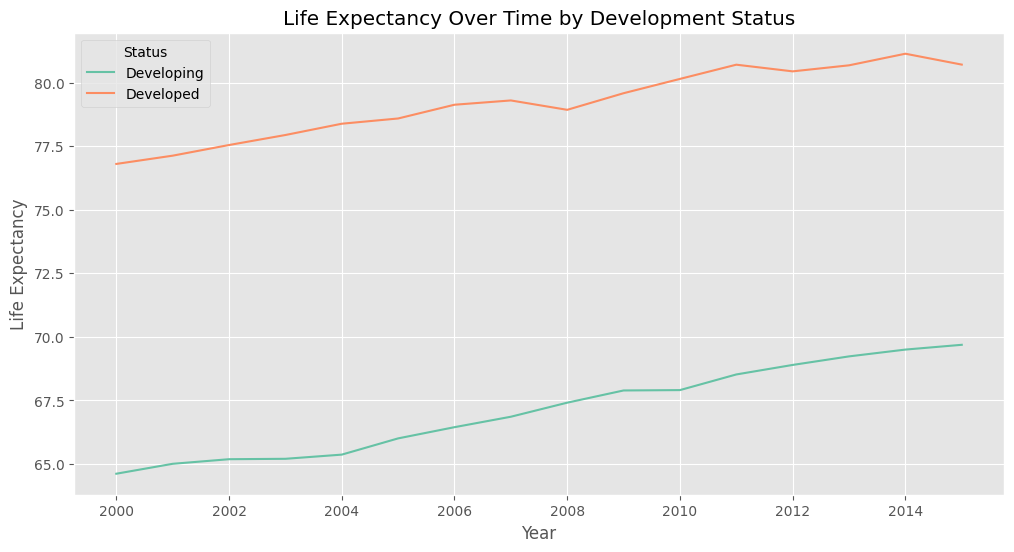

In [ ]:

#Whether developing countries are catching up
#The rate of improvement in each group

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='life_expectancy', hue='status', errorbar=None)
plt.title('Life Expectancy Over Time by Development Status')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Status')
plt.show()

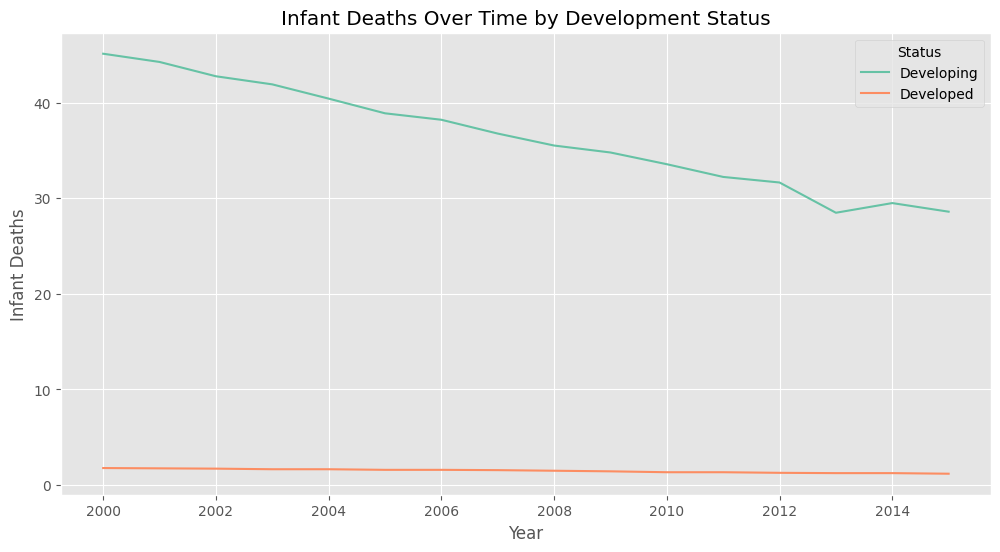

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='infant_deaths', hue='status', errorbar=None)
plt.title('Infant Deaths Over Time by Development Status')
plt.xlabel('Year')
plt.ylabel('Infant Deaths')
plt.legend(title='Status')
plt.show()

Trends by Development Status

- 🌍 Compared life expectancy and infant deaths over time by development status.
- 📈 Developed countries maintain higher life expectancy, but developing countries show steady improvement.
- 👶 Infant mortality is declining globally, though the gap remains.
- 📊 Used line plots grouped by year and status to visualize these trends.

5: Ranking Countries by Health Indicators 🏆🌍

We’ll look at:

Countries with highest and lowest life expectancy

Countries with the most infant deaths

In [ ]:
top_life = df[df['year'] == df['year'].max()]  # Use most recent year
top_life = top_life[['country', 'life_expectancy']].dropna()
top_life = top_life.sort_values(by='life_expectancy', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_life, x='life_expectancy', y='country', palette='viridis')
plt.title('Top 10 Countries by Life Expectancy (Most Recent Year)')
plt.xlabel('Life Expectancy')
plt.ylabel('Country')
plt.show()

In [ ]:
top_infant = df[df['year'] == df['year'].max()]
top_infant = top_infant[['country', 'infant_deaths']].dropna()
top_infant = top_infant.sort_values(by='infant_deaths', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_infant, x='infant_deaths', y='country', palette='magma')
plt.title('Top 10 Countries by Infant Deaths (Most Recent Year)')
plt.xlabel('Infant Deaths')
plt.ylabel('Country')
plt.show()

Country Rankings

- 🏆 Ranked countries by life expectancy and infant mortality.
- 📌 Identified top performers (e.g., Japan, Switzerland) and those with high health burdens.
- 📊 Visualized rankings with bar charts using the most recent available data.
- 🌍 Reinforced global health disparities and the need for targeted interventions.

# Improvements:
### - Missing data handling.

STEP 1A: Visualize Missing Values

This shows missingness in my dataset using a heatmap and bar chart:

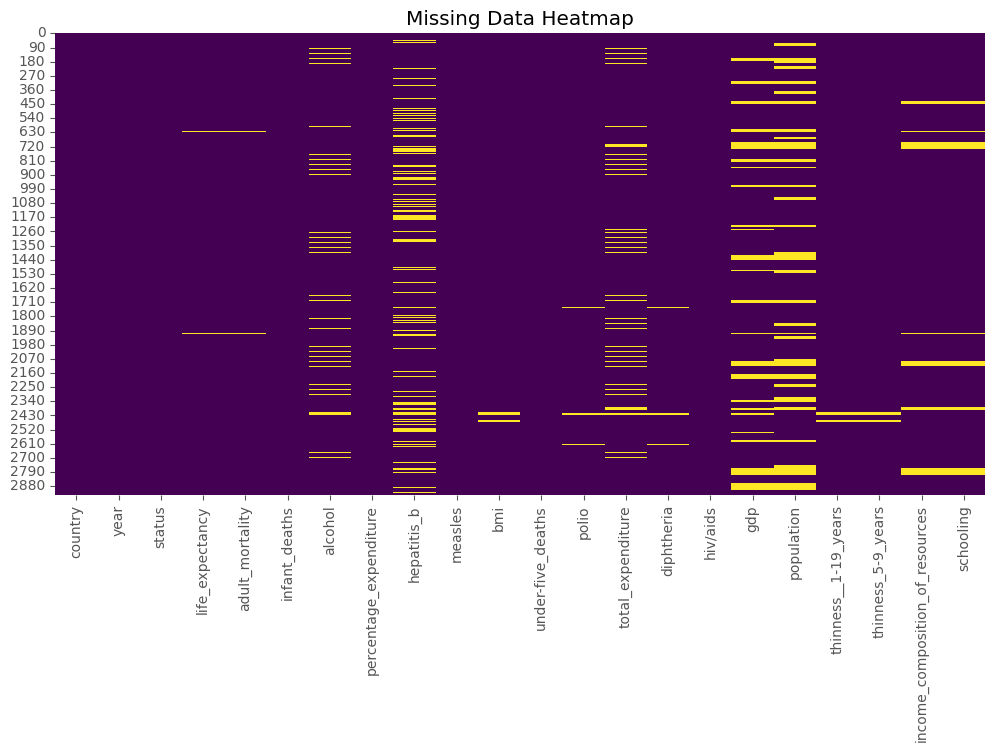

/tmp/ipython-input-36-2414387860.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


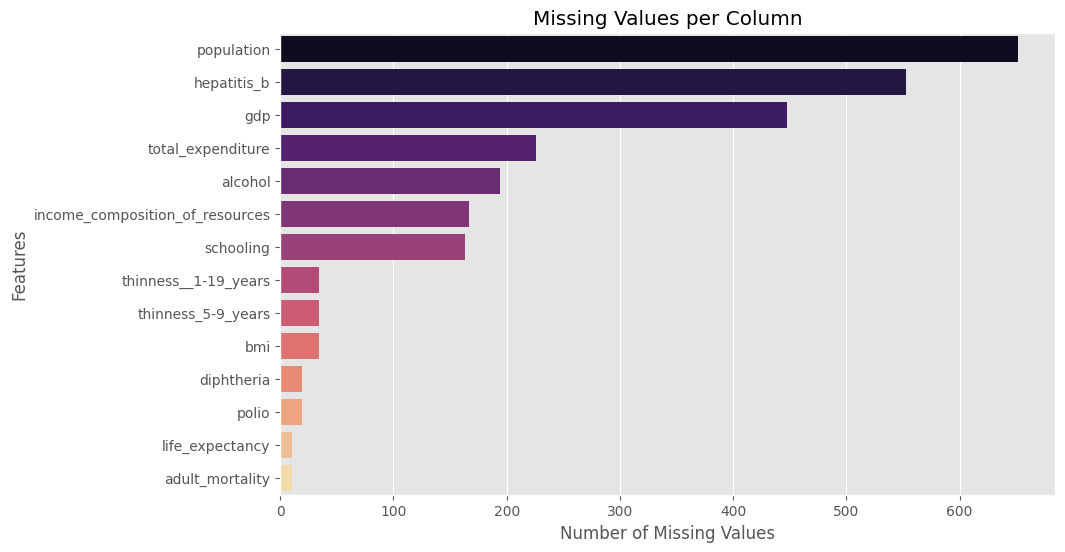

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# --- Heatmap of missing data ---
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

# --- Bar plot of missing value counts ---
missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_counts = missing_counts[missing_counts > 0]

plt.figure(figsize=(10, 6))
sns.barplot(
    x=missing_counts.values,
    y=missing_counts.index,
    hue=None,
    palette="magma",
    legend=False
)
plt.title("Missing Values per Column")
plt.xlabel("Number of Missing Values")
plt.ylabel("Features")
plt.show()

In [ ]:
print(missing_counts)

population                         652
hepatitis_b                        553
gdp                                448
total_expenditure                  226
alcohol                            194
income_composition_of_resources    167
schooling                          163
thinness__1-19_years                34
thinness_5-9_years                  34
bmi                                 34
diphtheria                          19
polio                               19
life_expectancy                     10
adult_mortality                     10
dtype: int64


1B: Imputation

- Dropping and filling out missing columns

In [ ]:
# Fill numeric columns with median
median_cols = [
    'population', 'gdp', 'total_expenditure', 'alcohol',
    'income_composition_of_resources', 'schooling',
    'thinness__1-19_years', 'thinness_5-9_years', 'bmi', 'adult_mortality'
]
df[median_cols] = df[median_cols].fillna(df[median_cols].median())

# Fill immunization columns with mean
df['hepatitis_b'] = df['hepatitis_b'].fillna(df['hepatitis_b'].mean())
df['diphtheria'] = df['diphtheria'].fillna(df['diphtheria'].mean())
df['polio'] = df['polio'].fillna(df['polio'].mean())

# Drop rows where life expectancy is missing (our target variable)
df = df.dropna(subset=['life_expectancy'])

# Confirm all missing values are handled
print("Remaining missing values:\n", df.isnull().sum().sort_values(ascending=False).head())

Remaining missing values:
 country            0
year               0
status             0
life_expectancy    0
adult_mortality    0
dtype: int64


## Step 1: Data Cleaning & Missing Value Imputation

The dataset contained several missing values across key health, economic, and demographic indicators. To ensure clean and consistent data for analysis and modeling, the following steps were taken:

### Missing Data Visualization
- Used heatmaps and bar plots to identify columns with missing values.
- Columns with missing values included: `population`, `hepatitis_b`, `gdp`, `alcohol`, `schooling`, `bmi`, `thinness__1-19_years`, `life_expectancy`, etc.

### Imputation Strategy

| Column Group | Method Used | Reason |
|--------------|-------------|--------|
| Numeric columns (`population`, `gdp`, `bmi`, etc.) | Median | Robust against outliers |
| Immunization rates (`hepatitis_b`, `diphtheria`, `polio`) | Mean | Bounded percentages,

🧩 2A. Feature SelectionI choose only the relevant, meaningful features for predicting life expectancy.

In [ ]:
# Check original columns
print(df.columns)

# Drop irrelevant or problematic columns
df_model = df.drop(columns=[
    'country',  # Unique identifier, not useful for prediction
    'year'      # Not relevant to modeling in this version
])

# Confirm
print("Selected Features:\n", df_model.columns)

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')
Selected Features:
 Index(['status', 'life_expectancy', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')


🛠️ 2B. Feature Scaling

We scale numerical features to ensure they are on the same scale — this improves model performance.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_model.drop(columns=['life_expectancy'])
y = df_model['life_expectancy']

# One-hot encode categorical variables (e.g., 'status')
X = pd.get_dummies(X, drop_first=True)

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Convert back to DataFrame (for readability)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Confirm shape and preview
print("Scaled Features Shape:", X_scaled.shape)
X_scaled.head()

Scaled Features Shape: (2928, 19)


,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,status_Developing
0,0.790238,0.267520,-1.16023,-0.336102,-0.708333,-0.110924,-0.966687,0.254061,-3.280188,0.940403,-0.733166,-0.324055,-0.453915,0.433887,2.811294,2.771446,-0.735757,-0.588857,0.460348
1,0.854614,0.284455,-1.16023,-0.334975,-0.841504,-0.168570,-0.991870,0.272732,-1.051925,0.948786,-0.860147,-0.324055,-0.451779,-0.183621,2.879495,2.816018,-0.750362,-0.619589,0.460348
2,0.830473,0.301391,-1.16023,-0.335128,-0.752724,-0.173968,-1.017054,0.291403,-0.880520,0.927827,-0.775493,-0.324055,-0.450348,0.396832,2.924962,2.860590,-0.779573,-0.650322,0.460348
3,0.862660,0.326794,-1.16023,-0.332633,-0.619553,0.031273,-1.042237,0.316299,-0.666264,1.091313,-0.648511,-0.324055,-0.447478,-0.121344,2.970429,2.927448,-0.813652,-0.681055,0.460348
4,0.886801,0.343730,-1.16023,-0.368345,-0.575163,0.050953,-1.062384,0.341194,-0.623413,0.818836,-0.606184,-0.324055,-0.493026,-0.134622,3.038629,2.972020,-0.857467,-0.773253,0.460348


Step 2C: Modeling Prep & Correlation Analysis
Aims:

- Understand relationships between features and the target

- Detect multicollinearity (features that are too similar)

- Gain insight into the most important drivers of life expectancy

🧠 1. Correlation Heatmap

We’ll plot correlations between all features and the target (life_expectancy), as well as between features themselves.

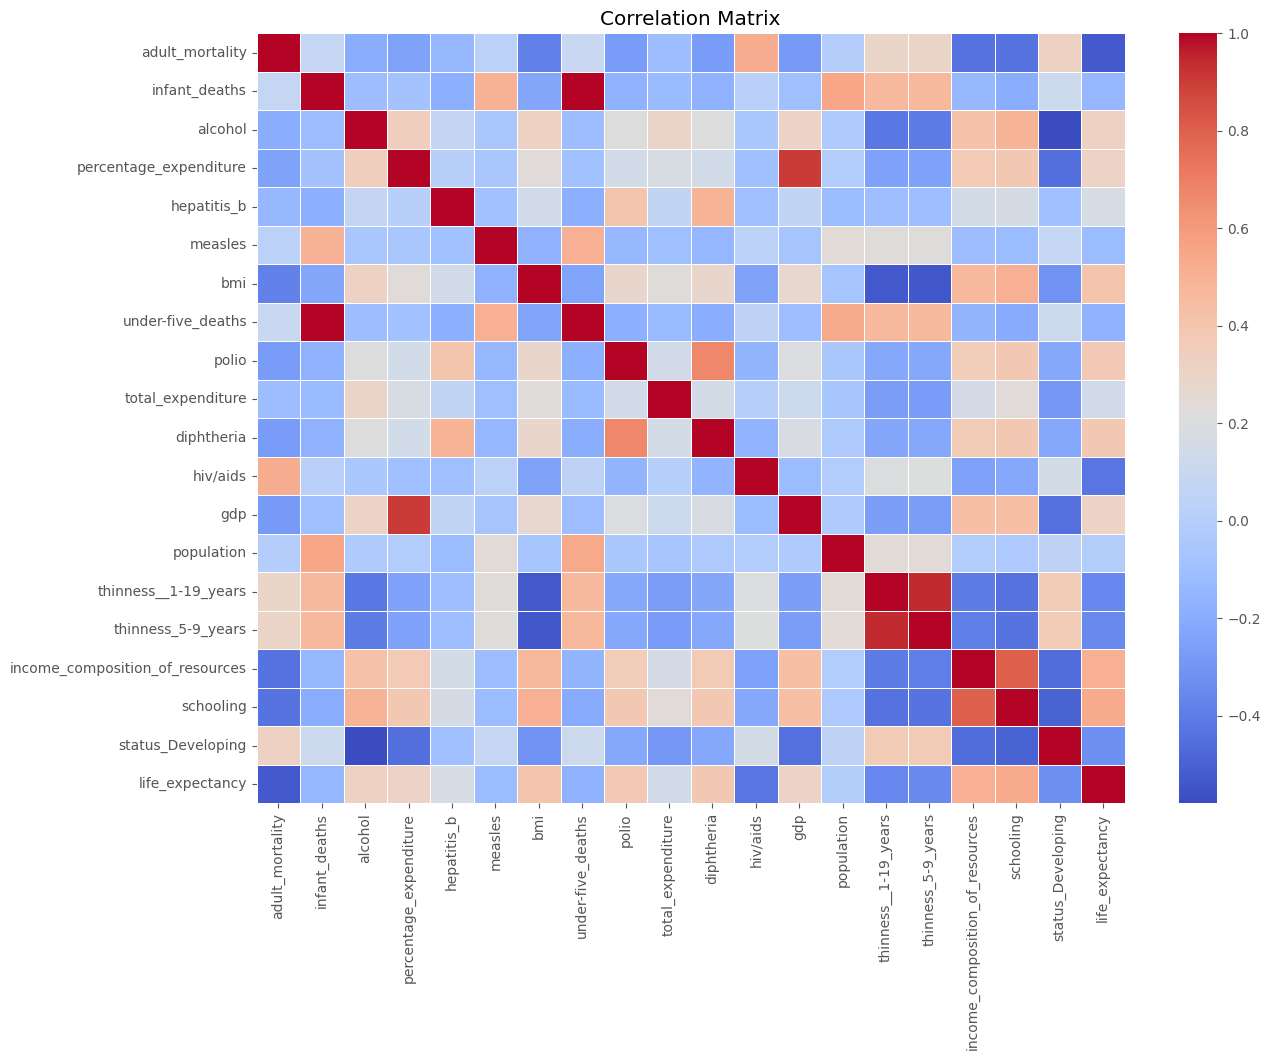

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine features with target for correlation matrix
df_corr = pd.concat([X_scaled, y], axis=1)

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

🔍 2. Top Correlated Features with Target.

To identify the top positive and negative correlations with life_expectancy.

In [ ]:
# Correlation with target
target_corr = corr_matrix['life_expectancy'].drop('life_expectancy').sort_values()

# Show top 5 negative and top 5 positive
print("Top features negatively correlated with Life Expectancy:\n")
print(target_corr.head(5))

print("\nTop features positively correlated with Life Expectancy:\n")
print(target_corr.tail(5))

Top features negatively correlated with Life Expectancy:

adult_mortality        -0.526887
hiv/aids               -0.429695
thinness__1-19_years   -0.351665
thinness_5-9_years     -0.345357
status_Developing      -0.322879
Name: life_expectancy, dtype: float64

Top features positively correlated with Life Expectancy:

polio                              0.377209
diphtheria                         0.387224
bmi                                0.411814
income_composition_of_resources    0.509614
schooling                          0.537162
Name: life_expectancy, dtype: float64


🚀 Step 3: Model Building & Evaluation

3A. Train-Test Split

Splitting the data so we can test how well our model generalizes.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (2342, 19)
Testing set shape: (586, 19)


3B. Model 1: Linear Regression (Baseline)

This gives us a simple benchmark model.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Linear Regression Performance:
MAE: 2.93
RMSE: 3.95
R² Score: 0.82


Step 3C: Random Forest Regressor

Random Forest builds multiple decision trees and averages their predictions for better accuracy and robustness.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Performance:")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

Random Forest Performance:
MAE: 1.07
RMSE: 1.72
R² Score: 0.97


Feature Importance

Features the Random Forest considered most useful:

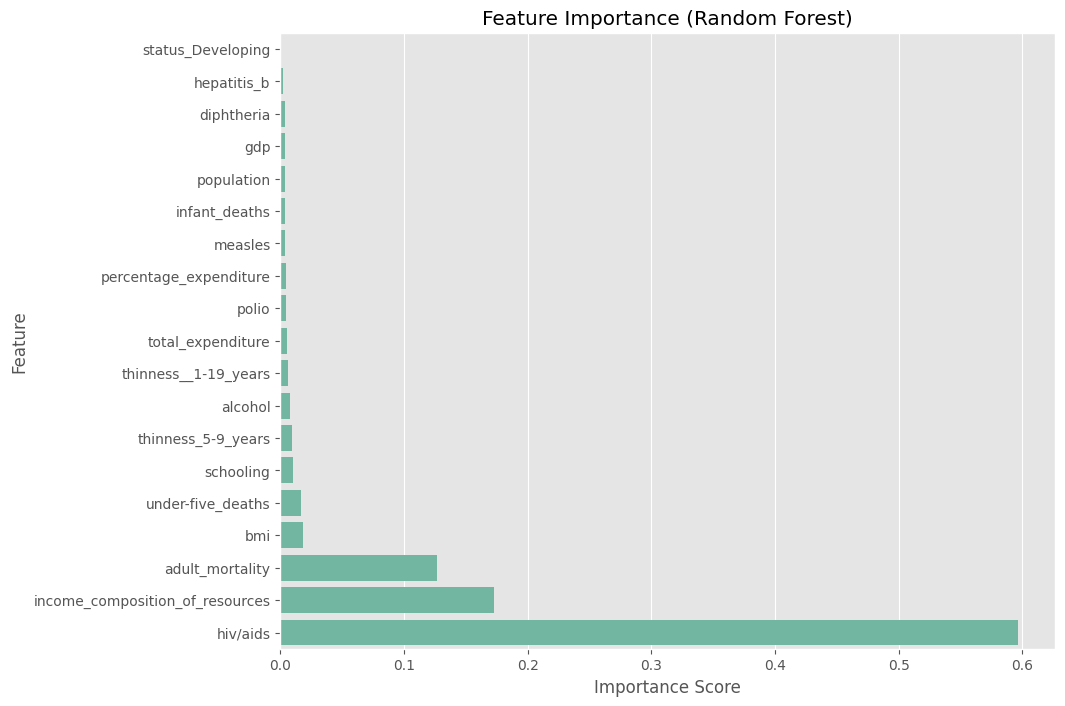

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_scaled.columns)
importances = importances.sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

Step 3D: Gradient Boosting Regressor (Model 3)

Gradient Boosting is another tree-based ensemble method. Unlike Random Forest, it builds trees sequentially, improving the errors of previous ones.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Predict
y_pred_gbr = gbr.predict(X_test)

# Evaluate
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Performance:")
print(f"MAE: {mae_gbr:.2f}")
print(f"RMSE: {rmse_gbr:.2f}")
print(f"R² Score: {r2_gbr:.2f}")

Gradient Boosting Performance:
MAE: 1.39
RMSE: 2.00
R² Score: 0.95


# Hyper parameter tuning:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the base model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Setup the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1,
                           verbose=2)

# Fit to the training data
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_rf.predict(X_test)

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Tuned Random Forest Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Tuned Random Forest Performance:
MAE: 1.07
RMSE: 1.72
R² Score: 0.97


# Saving and deployment

In [59]:
import joblib

# Save the tuned Random Forest model to a file
joblib.dump(best_rf, 'life_expectancy_rf_model.pkl')

print("✅ Model saved as 'life_expectancy_rf_model.pkl'")

✅ Model saved as 'life_expectancy_rf_model.pkl'
